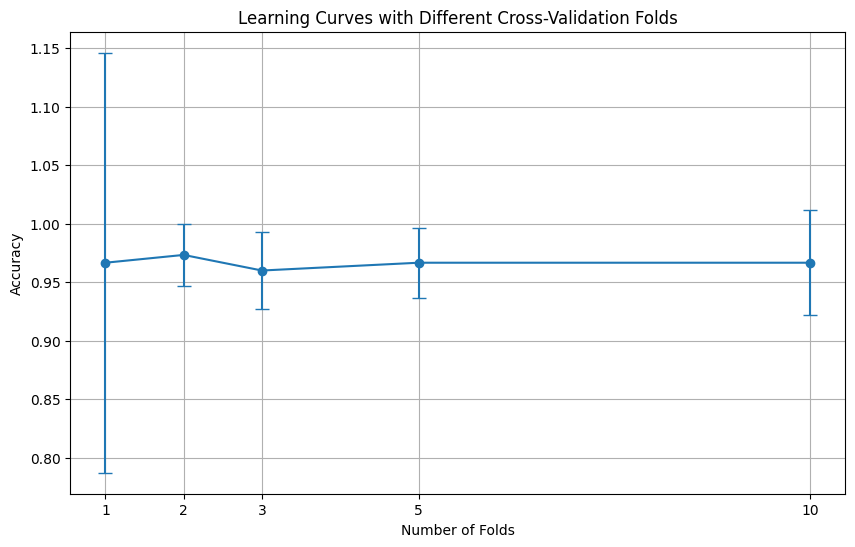

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, KFold, LeaveOneOut,learning_curve
from sklearn.datasets import load_iris  # You can replace this with your real dataset
from sklearn.svm import SVC  # Import the appropriate classifier from sklearn


# Load your real-time dataset here, replace load_iris with your dataset loading code
data = load_iris()
X, y = data.data, data.target

# Define the number of folds for cross-validation
num_folds = [1, 2, 3, 5, 10]

# Initialize lists to store the mean and standard deviation of accuracy scores
mean_scores = []
std_scores = []

# Perform cross-validation for each fold
for num_fold in num_folds:
  if num_fold == 1:
    cv = LeaveOneOut()
  else:
    cv = KFold(n_splits=num_fold, shuffle=True, random_state=42)

  clf = SVC() # Initialize your classifier here

  # Perform cross-validation and store the accuracy scores
  scores = cross_val_score(clf, X, y, cv=cv)
  mean_scores.append(np.mean(scores))
  std_scores.append(np.std(scores))

# Plot the learning curves
plt.figure(figsize=(10, 6))
plt.errorbar(num_folds, mean_scores, yerr=std_scores, marker='o', linestyle='-', capsize=5)
plt.title('Learning Curves with Different Cross-Validation Folds')
plt.xlabel('Number of Folds')
plt.ylabel('Accuracy')
plt.xticks(num_folds)
plt.grid(True)
plt.show()

Leave-One-Out
[[       nan        nan        nan ...        nan        nan        nan]
 [       nan        nan        nan ...        nan        nan        nan]
 [       nan        nan        nan ...        nan        nan        nan]
 ...
 [0.98319328 0.98319328 0.98319328 ... 0.99159664 0.99159664 0.99159664]
 [0.97014925 0.97014925 0.97014925 ... 0.96268657 0.96268657 0.96268657]
 [0.97315436 0.97315436 0.97315436 ... 0.97315436 0.97315436 0.97315436]]
Two-Fold
[[       nan        nan]
 [       nan        nan]
 [       nan        nan]
 [0.96666667        nan]
 [0.97297297        nan]
 [0.95555556        nan]
 [0.94230769 1.        ]
 [0.95       1.        ]
 [0.95522388 1.        ]
 [0.96       1.        ]]
Three-Fold
[[       nan        nan        nan]
 [       nan        nan        nan]
 [       nan        nan        nan]
 [       nan        nan        nan]
 [       nan        nan        nan]
 [0.96666667 1.         1.        ]
 [0.97142857 1.         1.        ]
 [0.95       1.    

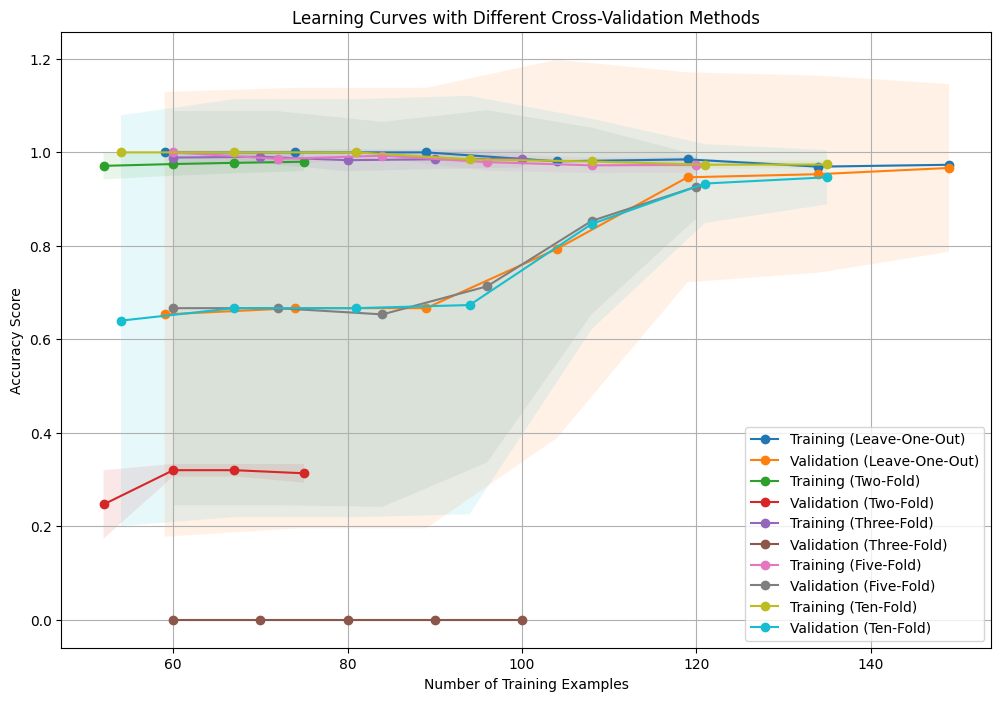

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import LeaveOneOut, KFold

# Load a real-time dataset (Iris dataset as an example)
data = load_iris()
X, y = data.data, data.target

# Create a machine learning model (Logistic Regression as an example)
model = LogisticRegression()

# Define cross-validation methods
cv_methods = {
    'Leave-One-Out': LeaveOneOut(),
    'Two-Fold': KFold(n_splits=2),
    'Three-Fold': KFold(n_splits=3),
    'Five-Fold': KFold(n_splits=5),
    'Ten-Fold': KFold(n_splits=10)
}

# Plot learning curves for each cross-validation method
plt.figure(figsize=(12, 8))
for name, cv_method in cv_methods.items():
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=cv_method, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
    )
    
    print(name)
    print(train_scores)
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    plt.plot(train_sizes, train_mean, marker='o', label=f'Training ({name})')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
    
    plt.plot(train_sizes, test_mean, marker='o', label=f'Validation ({name})')
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)

plt.title("Learning Curves with Different Cross-Validation Methods")
plt.xlabel("Number of Training Examples")
plt.ylabel("Accuracy Score")
plt.legend(loc="best")
plt.grid()
plt.show()